In [33]:
import pandas as pd

In [34]:
# Helper function to calculate F1 score
def calculate_f1(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

In [35]:
# List of files and sheets to process
# List of files to process
'''
files = [
    '12_TR_cooccur.xlsx',
    '13a_TR_w2v_lg_sim.xlsx',
    '13a_TR_w2v_sm_sim.xlsx',
    '13b_TR_w2v_lg_combined.xlsx',
    '13b_TR_w2v_sm_combined.xlsx',
    '14b_TR_w2v_lg_posfilter'
]


files = [
    '12_TR_cooccur.xlsx',
    '13b_TR_w2v_lg_combined.xlsx',
    '14b_TR_w2v_lg_posfilter.xlsx',
    '15b_TR_w2v_lg_pos_posisi.xlsx',
    '15b1_TR_w2v_lg_npos_posisi.xlsx',
    '16b_TR_w2v_lg_pos_posisi_wfrase.xlsx',
    '16b1_TR_w2v_lg_npos_posisi_wfrase.xlsx'
]
'''
files = [
    '10_tfidf_phrase_cv.xlsx',
    '11_tr_phrase_countvectorizer.xlsx',
    '12_TR_cooccur.xlsx',
    '13b_TR_w2v_lg_combined.xlsx',
    '15b1_TR_w2v_lg_npos_posisi.xlsx',
    '16b1_TR_w2v_lg_npos_posisi_wfrase.xlsx',
    '17b_TR_w2v_lg_tfidf_1wv.xlsx',
    '17b_TR_w2v_lg_tfidf_2trf.xlsx'
]

In [36]:
# Creating a list to store the results
results = []

# Loop through each file, calculate means and F1 scores, and store them in the results list
for file in files:
    result = {'Excel File': file}

    # Fixed sheet names based on the provided column naming pattern
    sheets = ['10', '5', '3']
    
    for sheet_suffix in sheets:
        sheet_name = f"{file.split('.')[0]}_{sheet_suffix}"
        df = pd.read_excel(file, sheet_name=sheet_name)

        mean_flex_recall = df['flex_recall'].mean()
        mean_flex_prec = df['flex_prec'].mean()
        mean_f1_score = calculate_f1(mean_flex_prec, mean_flex_recall)
        
        prefix = f"top-{sheet_suffix}"
        result[f'{prefix} + flex_recall'] = mean_flex_recall
        result[f'{prefix} + flex_prec'] = mean_flex_prec
        result[f'{prefix} + flex_F1'] = mean_f1_score

    results.append(result)

# Creating a DataFrame to display the results
result_df = pd.DataFrame(results)
print(result_df)

# Save the result DataFrame to an Excel file
result_df.to_excel('results.xlsx', index=False)
print("Results have been saved to 'results.xlsx'.")

                               Excel File  top-10 + flex_recall  \
0                 10_tfidf_phrase_cv.xlsx              0.319525   
1       11_tr_phrase_countvectorizer.xlsx              0.317515   
2                      12_TR_cooccur.xlsx              0.378391   
3             13b_TR_w2v_lg_combined.xlsx              0.318277   
4         15b1_TR_w2v_lg_npos_posisi.xlsx              0.356689   
5  16b1_TR_w2v_lg_npos_posisi_wfrase.xlsx              0.356689   
6            17b_TR_w2v_lg_tfidf_1wv.xlsx              0.356689   
7           17b_TR_w2v_lg_tfidf_2trf.xlsx              0.361688   

   top-10 + flex_prec  top-10 + flex_F1  top-5 + flex_recall  \
0              0.2236          0.263092             0.200984   
1              0.2222          0.261441             0.189272   
2              0.2648          0.311565             0.257161   
3              0.2227          0.262045             0.217446   
4              0.2496          0.293687             0.248017   
5           

In [37]:
# Save the result DataFrame to an Excel file
result_df.to_excel('summary_results.xlsx', index=False)
print("Results have been saved to 'results.xlsx'.")

Results have been saved to 'results.xlsx'.


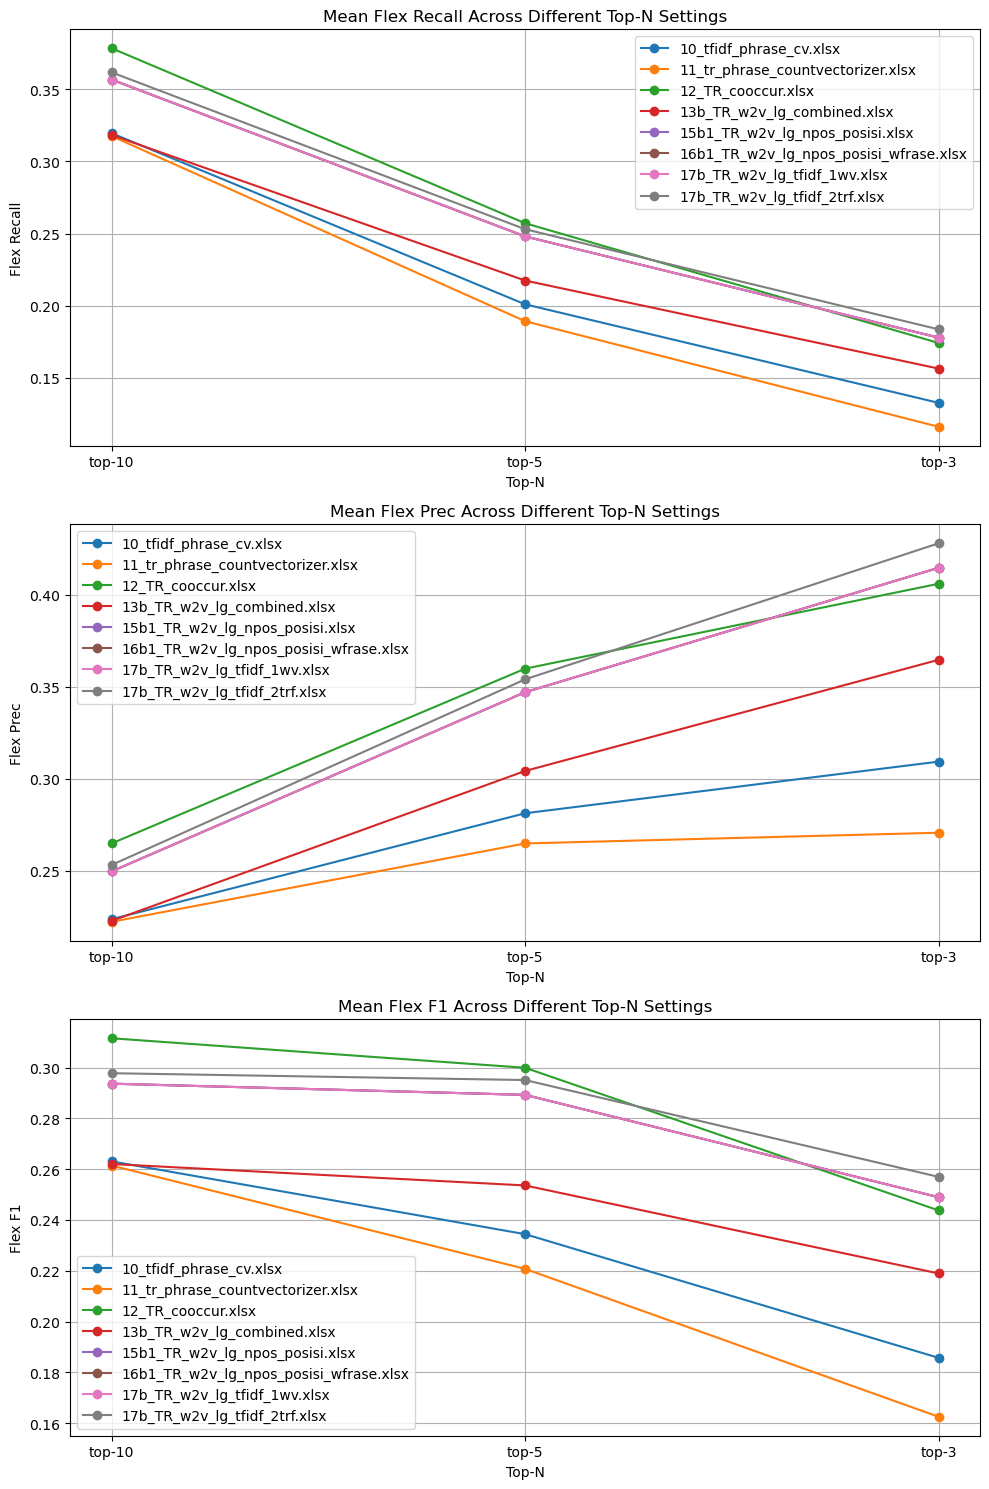

In [38]:
# Plotting
import matplotlib.pyplot as plt
# Convert the 'Excel File' column to a categorical type with ordered categories
result_df['Excel File'] = pd.Categorical(result_df['Excel File'], categories=result_df['Excel File'].unique(), ordered=True)

# Sort DataFrame by 'Excel File'
result_df = result_df.sort_values('Excel File')

# Set the 'Excel File' column as the index
result_df.set_index('Excel File', inplace=True)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

metrics = ['flex_recall', 'flex_prec', 'flex_F1']
top_n = ['top-10', 'top-5', 'top-3']

for i, metric in enumerate(metrics):
    ax = axes[i]
    for file in result_df.index:
        values = [result_df.at[file, f'{top} + {metric}'] for top in top_n]
        ax.plot(top_n, values, marker='o', label=file)

    ax.set_title(f'Mean {metric.replace("_", " ").title()} Across Different Top-N Settings')
    ax.set_xlabel('Top-N')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


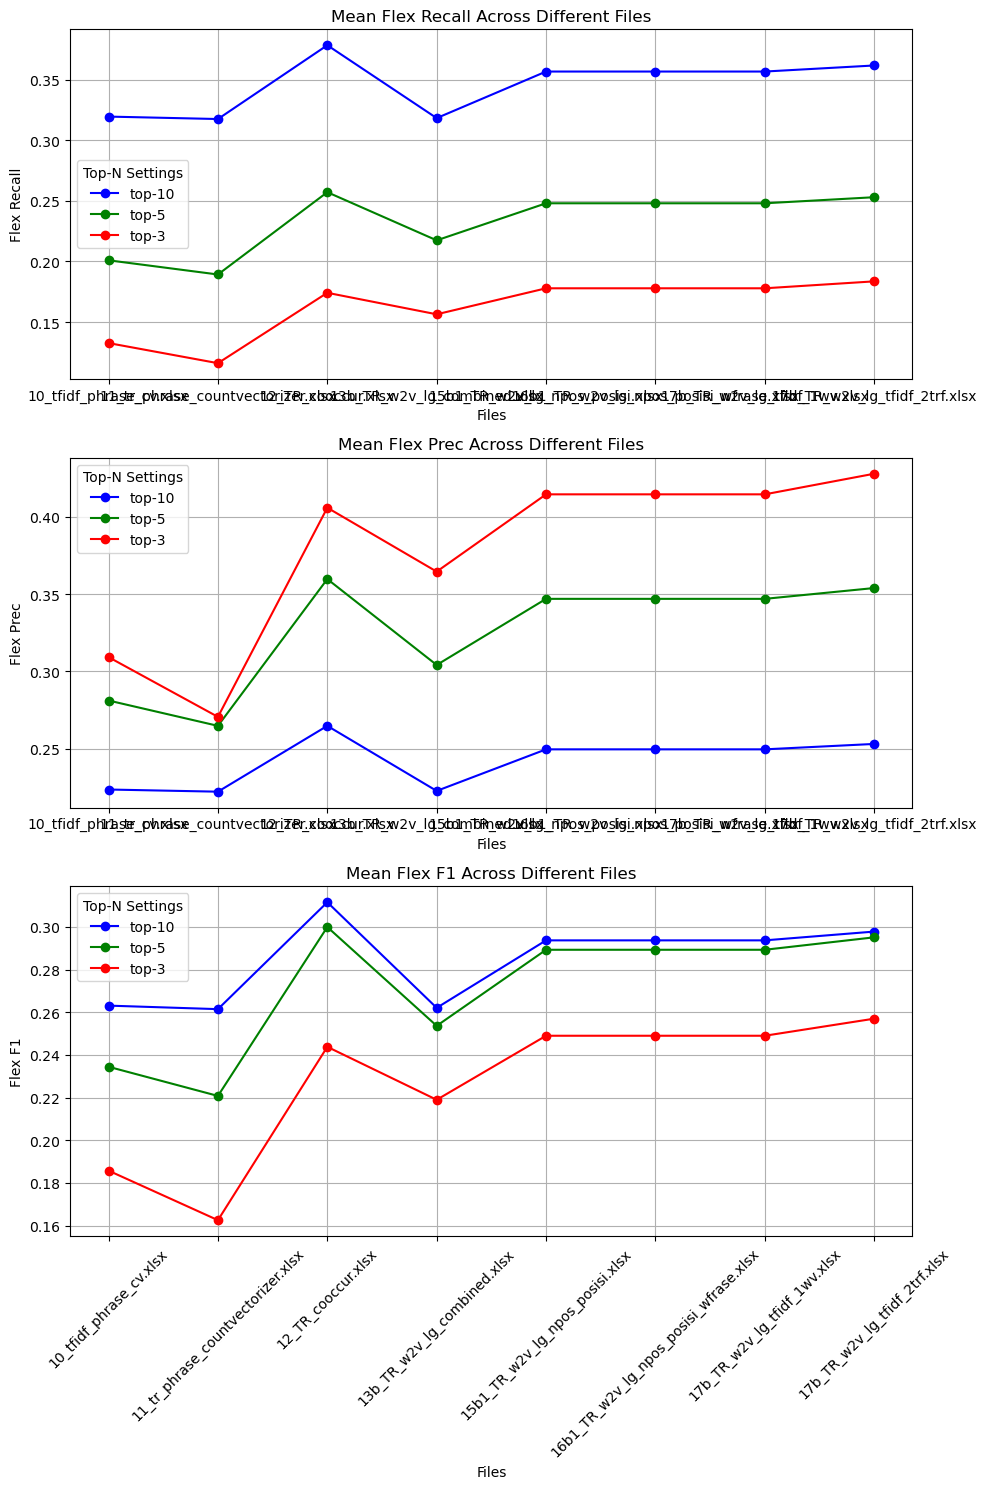

In [39]:
# Plotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

metrics = ['flex_recall', 'flex_prec', 'flex_F1']
top_n = ['top-10', 'top-5', 'top-3']
colors = ['b', 'g', 'r']  # Colors for top-10, top-5, and top-3

for i, metric in enumerate(metrics):
    ax = axes[i]
    for j, top in enumerate(top_n):
        values = [result_df[f'{top} + {metric}'] for file in files]
        ax.plot(files, values[j], marker='o', label=f'{top}', color=colors[j])

    ax.set_title(f'Mean {metric.replace("_", " ").title()} Across Different Files')
    ax.set_xlabel('Files')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.grid(True)
    ax.legend(title="Top-N Settings")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()